In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import pearsonr

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
warnings.simplefilter("ignore", category=UserWarning)

In [2]:
df = pd.read_csv('main.csv')
pct_feats = [col for col in df.columns if '%' in col and 'lag' not in col and 'screen' not in col]
lag_feats = [col for col in df.columns if 'lag' in col]
screen = [col for col in df.columns if 'screen' in col]
dollar_volumes = [col for col in df.columns if 'dv' in col]
returns = ['vwap_return', 'vwap_ft_return', 'ask_bid_return', 'mid_return','vwap_sfill_return']
entry_desc = ['first_tick_time','close_quote_time','open_quote_time']
indexes = [col for col in df.columns if '_pc' in col or '_ah' in col]

<h1>Evaluate Screen</h1>

<h2>Binary Outcomes</h1>

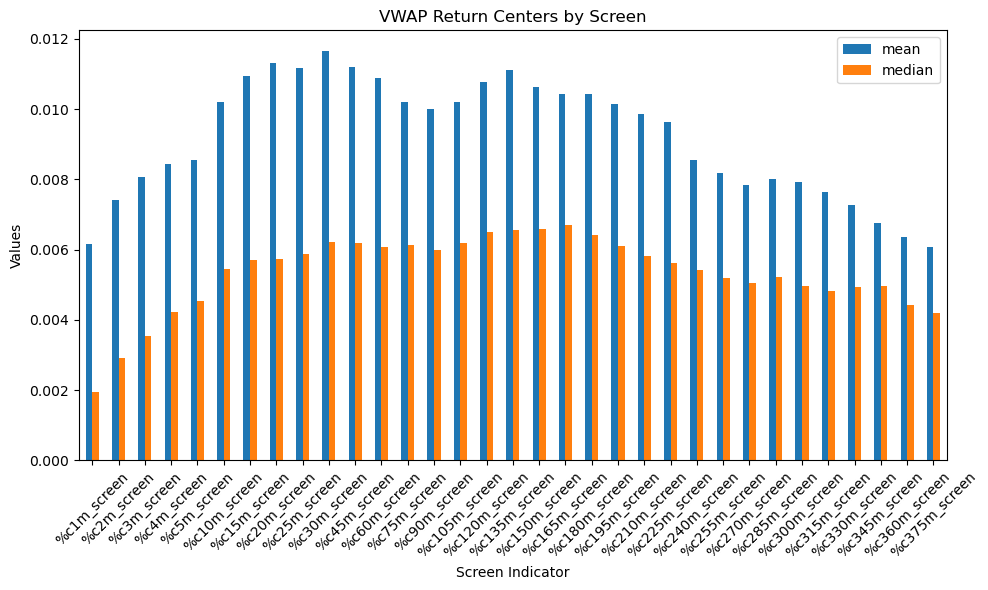

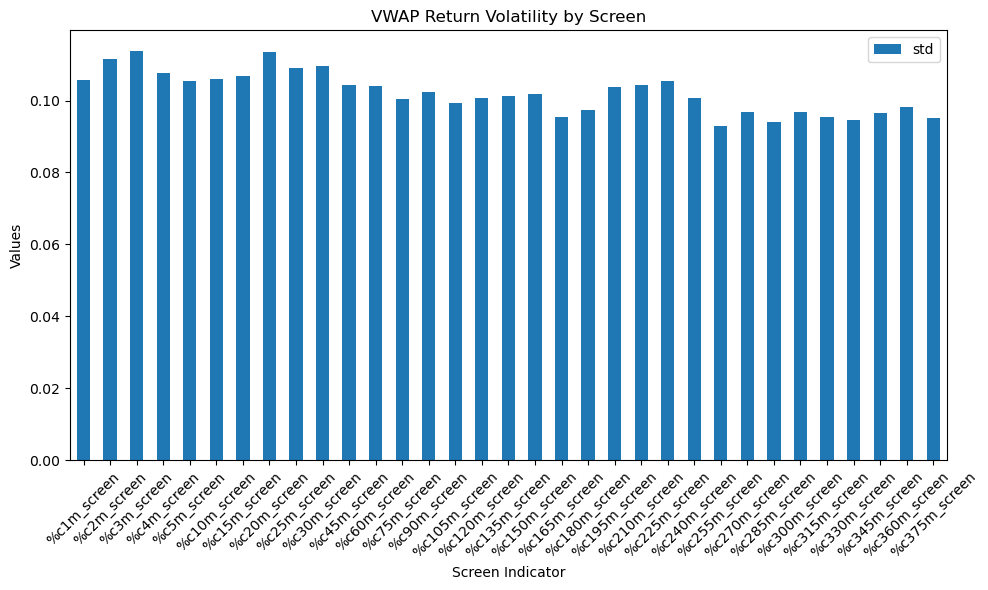

In [3]:
means = []
medians = []
stds = []
for col in screen:
    sdf = df[df[col] == 1]['vwap_return'].agg(['mean', 'median', 'std'])
    means.append(sdf['mean'])
    medians.append(sdf['median'])
    stds.append(sdf['std'])
centerdf = pd.DataFrame({'mean': means,'median': medians}, index=screen)
centerdf.plot(kind='bar', figsize=(10, 6))
plt.title('VWAP Return Centers by Screen')
plt.ylabel('Values')
plt.xlabel('Screen Indicator')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
voladf = pd.DataFrame({'std':stds}, index=screen)
voladf.plot(kind='bar', figsize=(10, 6))
plt.title('VWAP Return Volatility by Screen')
plt.ylabel('Values')
plt.xlabel('Screen Indicator')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>Number of screens</h1>

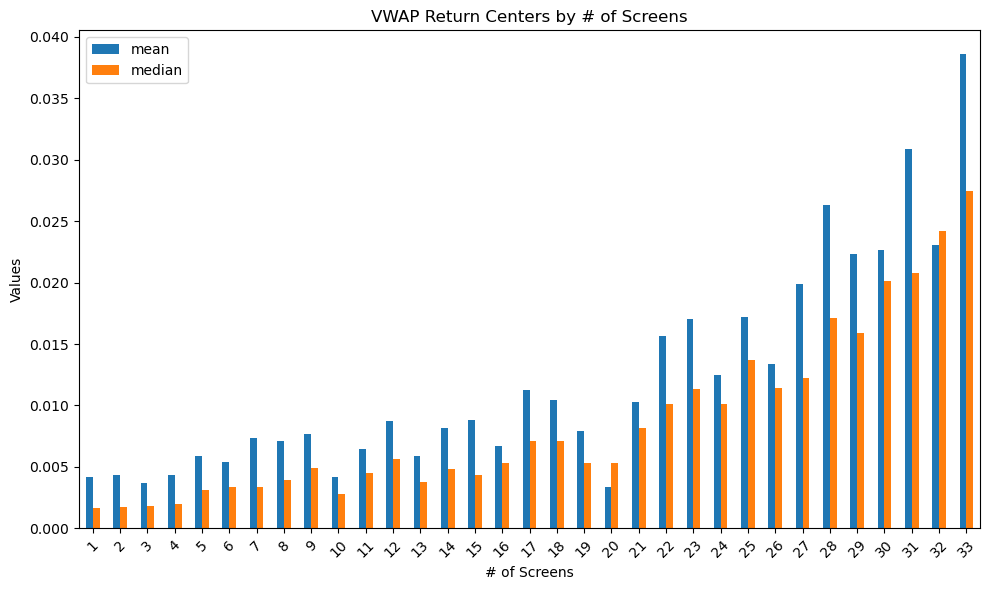

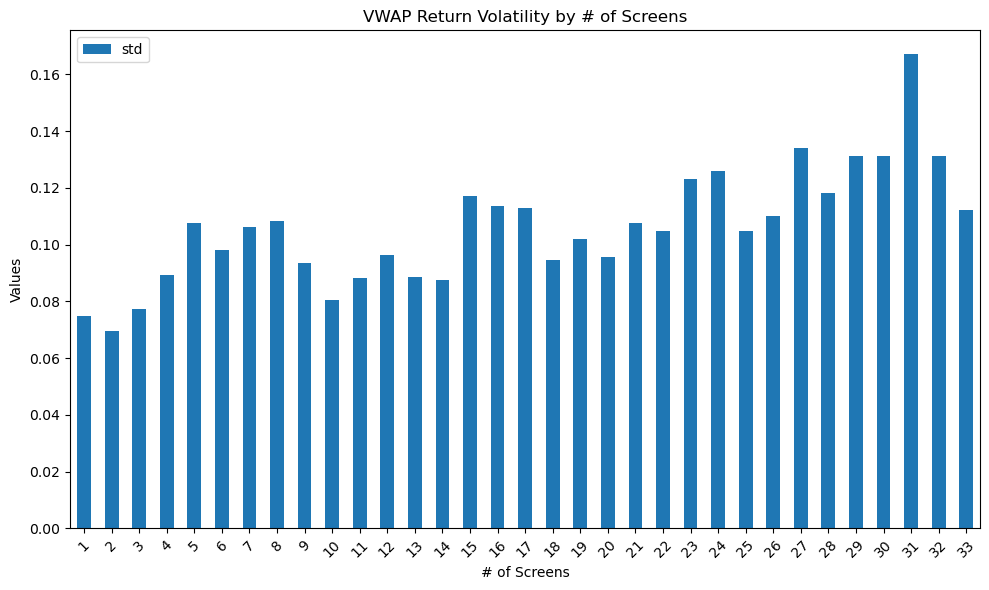

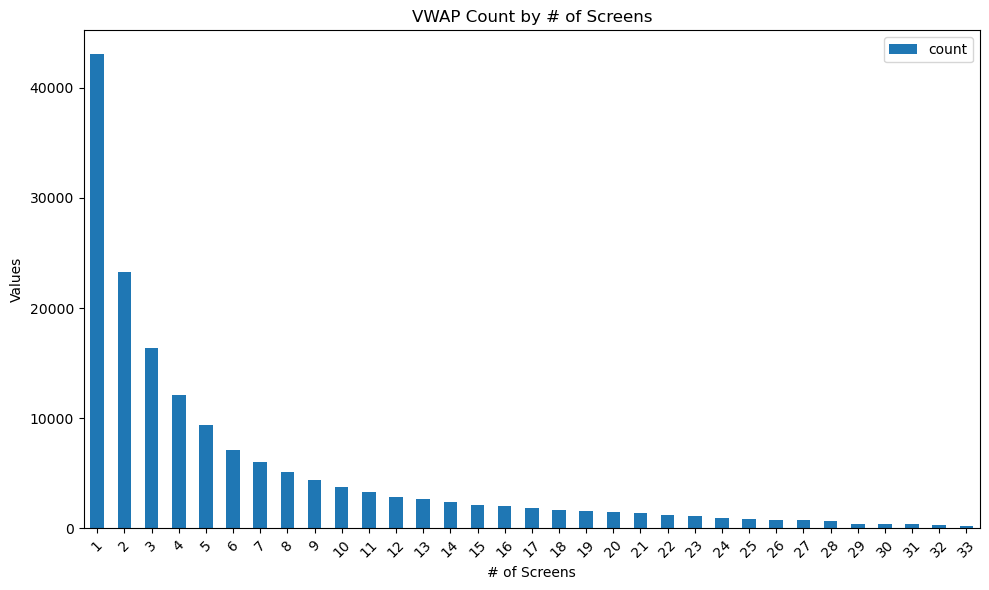

In [4]:
df['screen_sum'] = df[screen].sum(axis=1)
means = []
medians = []
stds = []
counts = []
for x in range(1,34):
    xdf = df[df['screen_sum'] == x]['vwap_return'].agg(['mean','median','std','count'])
    means.append(xdf['mean'])
    medians.append(xdf['median'])
    stds.append(xdf['std'])
    counts.append(xdf['count'])
centerdf = pd.DataFrame({'mean': means,'median': medians}, index=range(1,34))
centerdf.plot(kind='bar', figsize=(10, 6))
plt.title('VWAP Return Centers by # of Screens')
plt.ylabel('Values')
plt.xlabel('# of Screens')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
voladf = pd.DataFrame({'std':stds}, index=range(1,34))
voladf.plot(kind='bar', figsize=(10, 6))
plt.title('VWAP Return Volatility by # of Screens')
plt.ylabel('Values')
plt.xlabel('# of Screens')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
ctdf = pd.DataFrame({'count':counts}, index=range(1,34))
ctdf.plot(kind='bar', figsize=(10, 6))
plt.title('VWAP Count by # of Screens')
plt.ylabel('Values')
plt.xlabel('# of Screens')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>Types</h1>

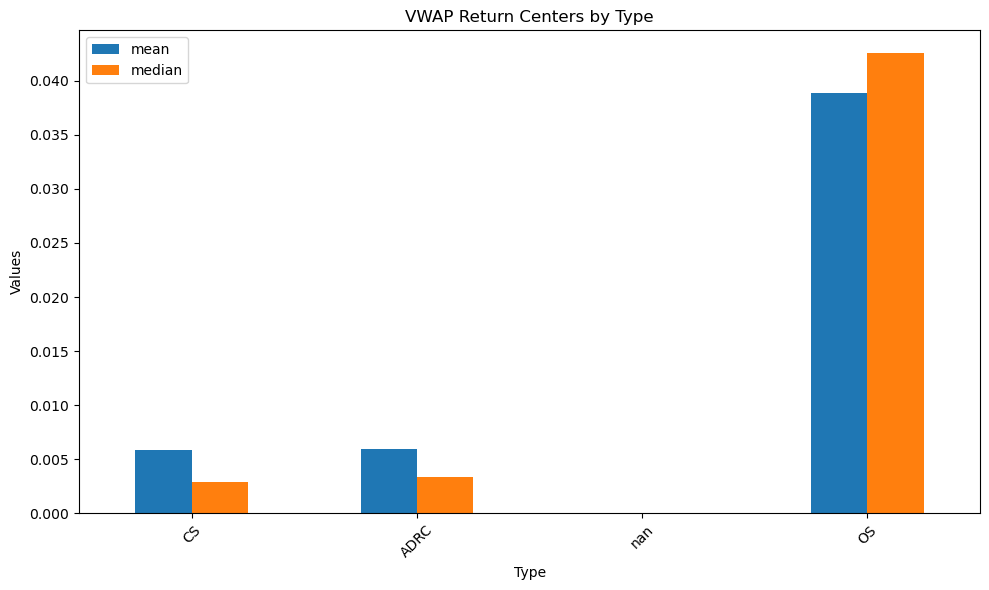

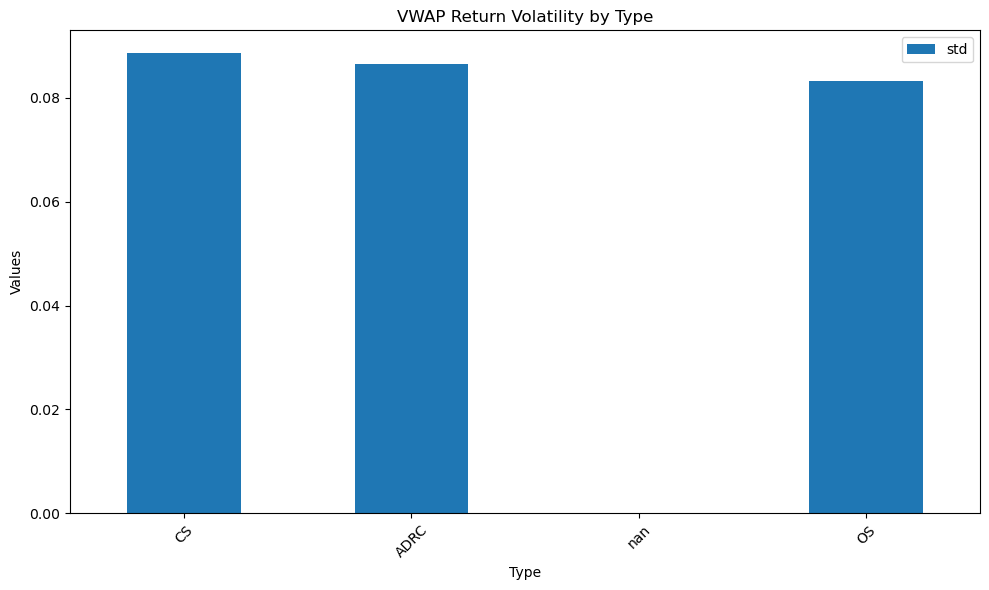

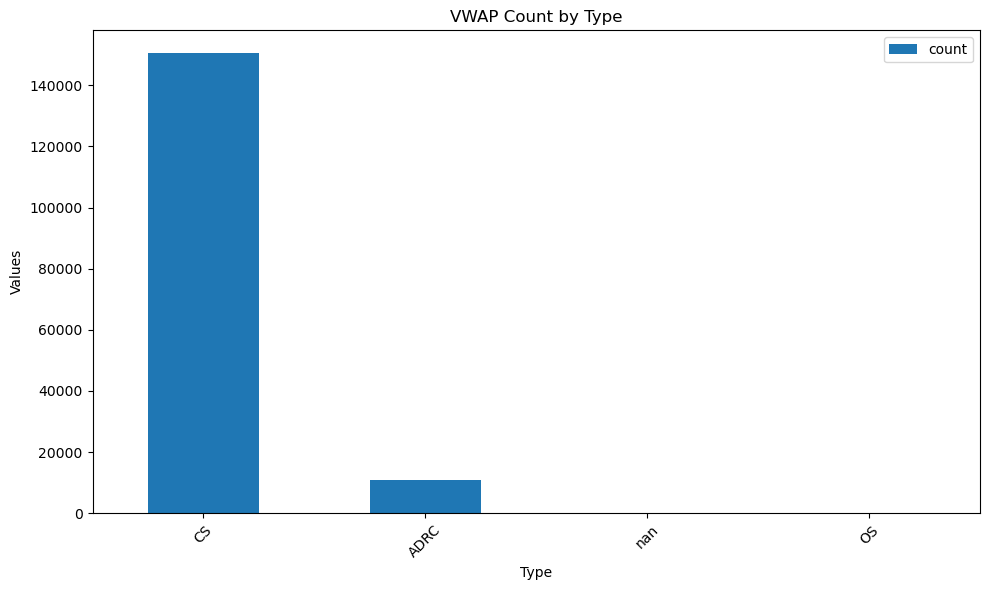

In [5]:
means = []
medians = []
stds = []
counts = []
for x in df['type'].unique():
    xdf = df[df['type'] == x]['vwap_return'].agg(['mean','median','std','count'])
    means.append(xdf['mean'])
    medians.append(xdf['median'])
    stds.append(xdf['std'])
    counts.append(xdf['count'])
centerdf = pd.DataFrame({'mean': means,'median': medians}, index=df['type'].unique())
centerdf.plot(kind='bar', figsize=(10, 6))
plt.title('VWAP Return Centers by Type')
plt.ylabel('Values')
plt.xlabel('Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
voladf = pd.DataFrame({'std':stds}, index=df['type'].unique())
voladf.plot(kind='bar', figsize=(10, 6))
plt.title('VWAP Return Volatility by Type')
plt.ylabel('Values')
plt.xlabel('Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
ctdf = pd.DataFrame({'count':counts}, index=df['type'].unique())
ctdf.plot(kind='bar', figsize=(10, 6))
plt.title('VWAP Count by Type')
plt.ylabel('Values')
plt.xlabel('Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>Market Cap</h1>

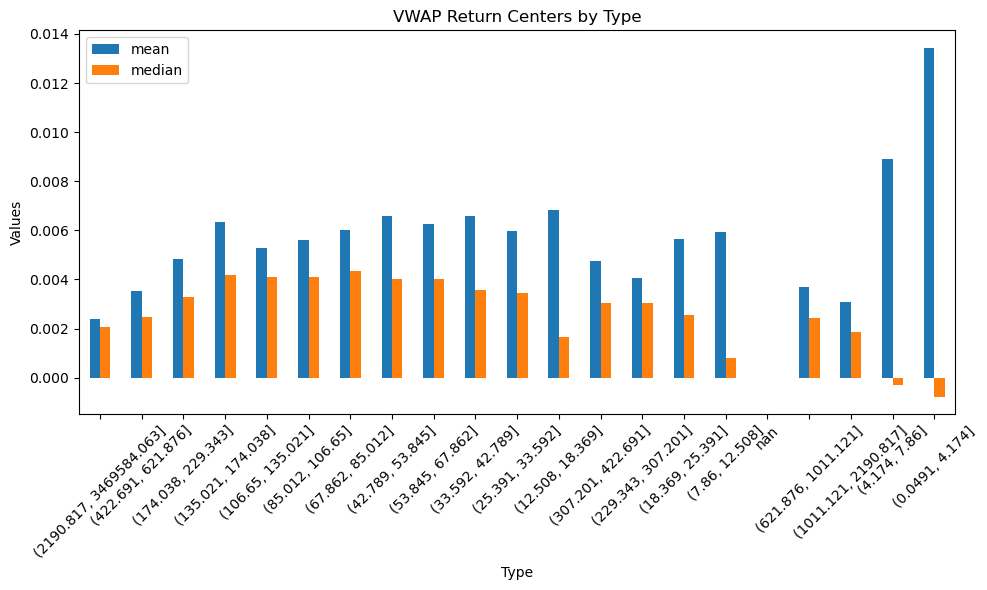

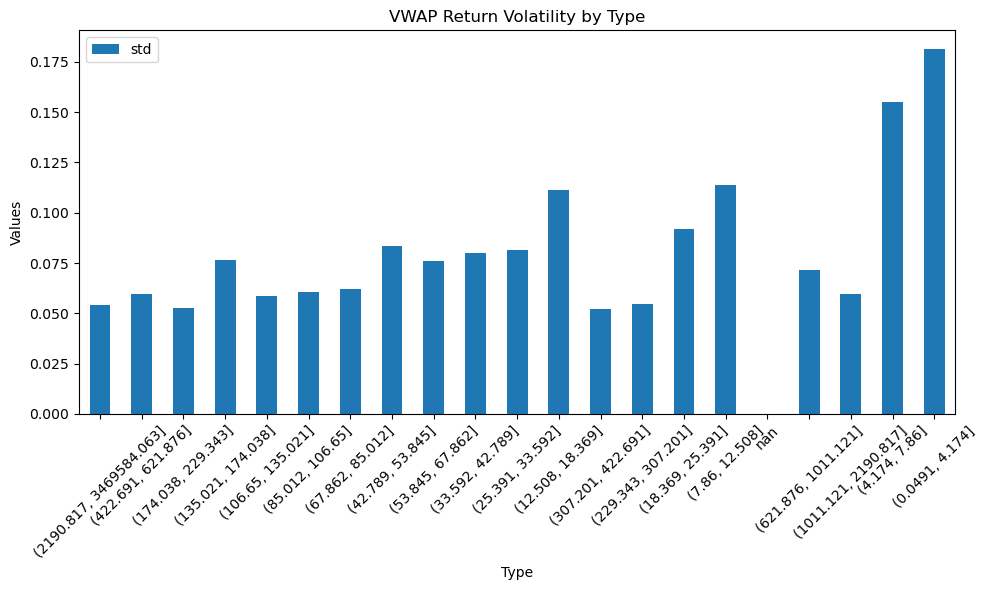

In [6]:
df['cap_bin'] = pd.qcut(df['market_cap']/1_000_000,q=20)
means = []
medians = []
stds = []
counts = []
for x in df['cap_bin'].unique():
    xdf = df[df['cap_bin'] == x]['vwap_return'].agg(['mean','median','std','count'])
    means.append(xdf['mean'])
    medians.append(xdf['median'])
    stds.append(xdf['std'])
    counts.append(xdf['count'])
centerdf = pd.DataFrame({'mean': means,'median': medians}, index=df['cap_bin'].unique())
centerdf.plot(kind='bar', figsize=(10, 6))
plt.title('VWAP Return Centers by Type')
plt.ylabel('Values')
plt.xlabel('Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
voladf = pd.DataFrame({'std':stds}, index=df['cap_bin'].unique())
voladf.plot(kind='bar', figsize=(10, 6))
plt.title('VWAP Return Volatility by Type')
plt.ylabel('Values')
plt.xlabel('Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>R^2 (Pearson)</h1>

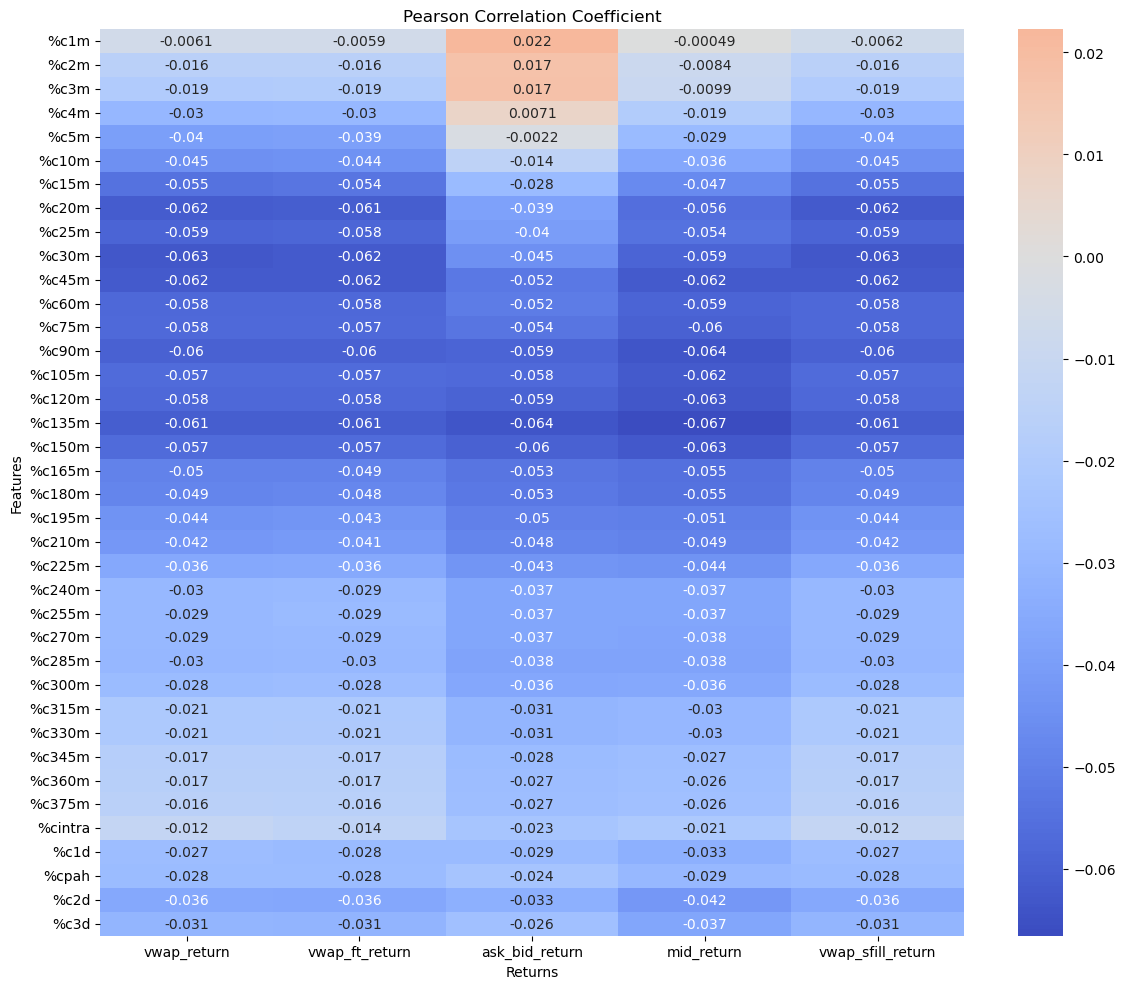

In [5]:
correlation_matrix = df[pct_feats + returns].corr().loc[pct_feats, returns]
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, cbar=True)
plt.title('Pearson Correlation Coefficient')
plt.xlabel('Returns')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

<h1>R^2 (Spearman)</h1>

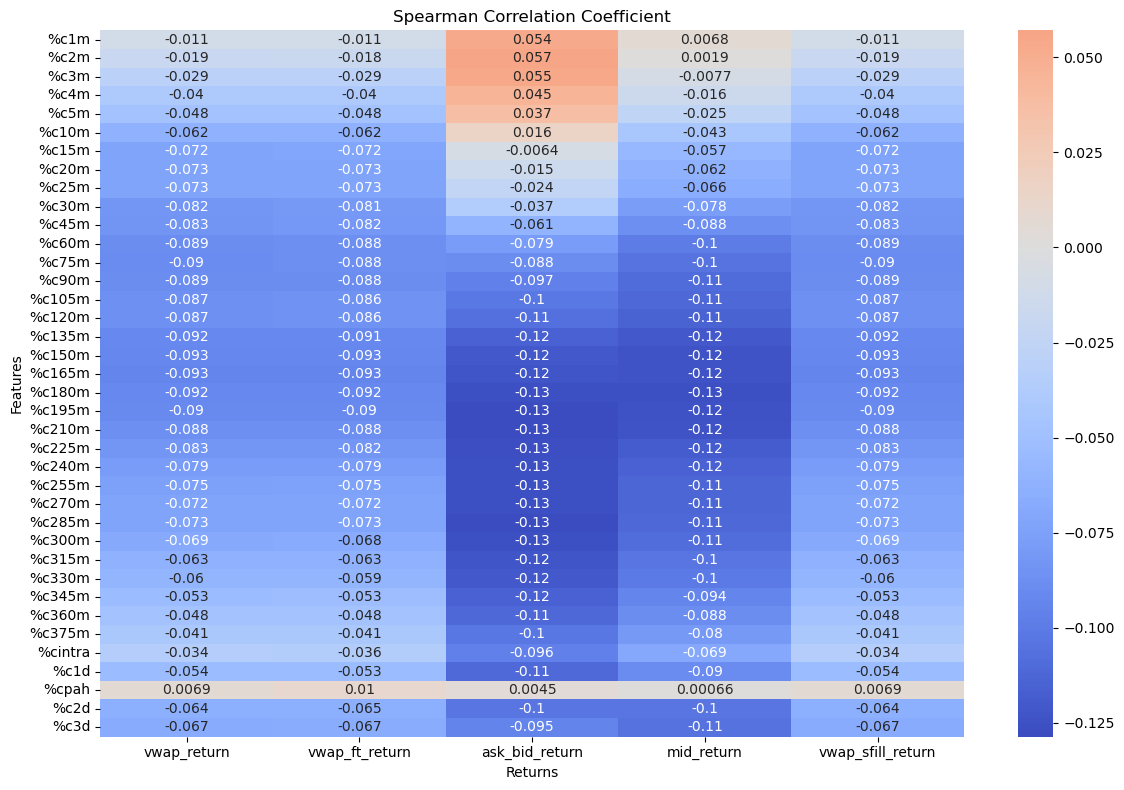

In [6]:
spearman_corr = df[pct_feats + returns].corr(method='spearman').loc[pct_feats, returns]
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0, cbar=True)
plt.title('Spearman Correlation Coefficient')
plt.xlabel('Returns')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

<h1>Plot returns by percentile</h1>

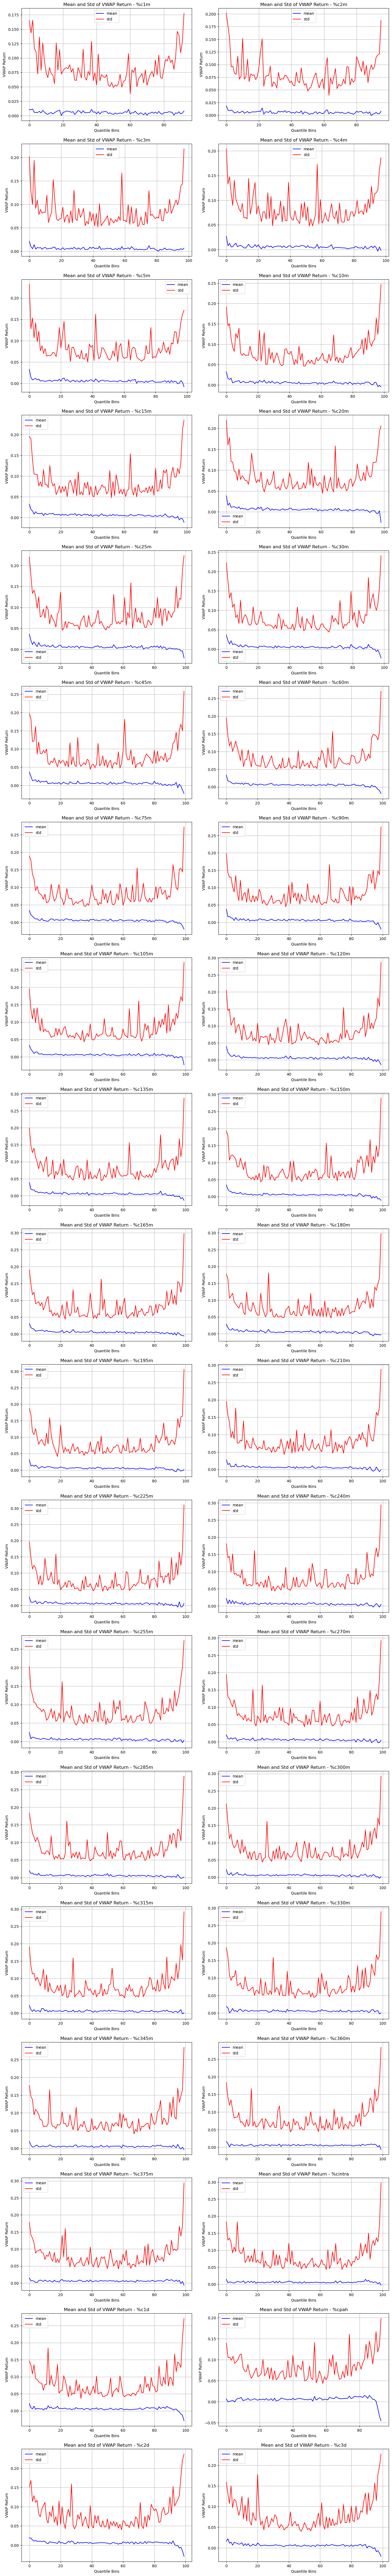

In [8]:
fig, axes = plt.subplots(len(pct_feats) // 2 + len(pct_feats) % 2, 2, figsize=(15, 5 * (len(pct_feats) // 2 + len(pct_feats) % 2)))
fig.tight_layout(pad=4.0)  # Adjust spacing between subplots

# Flatten axes if there is only one row or column
axes = axes.flatten()

for i, col in enumerate(pct_feats):
    # Calculate binning and aggregation
    df['bin'] = pd.qcut(df[col], q=100, duplicates='drop')
    gdf = pd.DataFrame(df.groupby('bin')['vwap_return'].agg(['mean', 'std']))
    gdf.reset_index(inplace=True)
    
    # Plot mean and standard deviation
    ax = axes[i]
    ax.plot(gdf.index, gdf['mean'], label='mean', color='blue')
    ax.plot(gdf.index, gdf['std'], label='std', color='red')
    
    # Customize subplot
    ax.set_title(f'Mean and Std of VWAP Return - {col}')
    ax.set_xlabel('Quantile Bins')
    ax.set_ylabel('VWAP Return')
    ax.legend()
    ax.grid(True)

# Show the plot
plt.show()


<h1>First percentile comparisons</h1>

In [7]:
means = []
medians = []
stds = []
for col in pct_feats:
    mn,me,std = df[df[col] <= df[col].quantile(.01)]['vwap_return'].agg(['mean','median','std'])
    means.append(mn)
    medians.append(me)
    stds.append(std)
testdf = pd.DataFrame({'feat':pct_feats,'mean':means,'median':medians,'std':stds})
testdf

,feat,mean,median,std
0,%c1m,0.011668,0.002650,0.165330
1,%c2m,0.019283,0.005893,0.201808
2,%c3m,0.022327,0.008929,0.201862
3,%c4m,0.027730,0.012854,0.204470
4,%c5m,0.031362,0.014161,0.227987
5,%c10m,0.030997,0.014415,0.188564
6,%c15m,0.030678,0.014264,0.192723
7,%c20m,0.035613,0.017079,0.216568
8,%c25m,0.033890,0.014588,0.224216
9,%c30m,0.034765,0.016053,0.220653


In [11]:
means = []
medians = []
stds = []
tiles = []
for col in pct_feats:
    mn,me,std = df[df[col] <= df[col].quantile(.01)]['vwap_sfill_return'].agg(['mean','median','std'])
    means.append(mn)
    medians.append(me)
    stds.append(std)
    tiles.append(df[col].quantile(.01))
testdf = pd.DataFrame({'feat':pct_feats,'mean':means,'median':medians,'std':stds,'tile_cutoff':tiles})
testdf.sort_values(by='mean',ascending=False)

,feat,mean,median,std,tile_cutoff
15,%c120m,0.036678,0.017281,0.199988,-0.148752
13,%c90m,0.036024,0.015630,0.195353,-0.134790
7,%c20m,0.035613,0.017079,0.216568,-0.084424
16,%c135m,0.035397,0.013076,0.196163,-0.158002
10,%c45m,0.034787,0.015222,0.196599,-0.108216
9,%c30m,0.034765,0.016053,0.220653,-0.095297
8,%c25m,0.033890,0.014588,0.224216,-0.090396
12,%c75m,0.031844,0.016041,0.186517,-0.128259
4,%c5m,0.031362,0.014161,0.227987,-0.053510
11,%c60m,0.031333,0.012277,0.191984,-0.119669
